In [1]:
import os

# change working directory, run this cell once
os.chdir("../")

# supress warnings
import warnings
warnings.filterwarnings("ignore")

This notebook will demonstrate how to use Bayesian Optimization + Warmstarting to fit handwritten digits dataset.

### Import packages

In [2]:
from autocluster import AutoCluster
from evaluators import get_evaluator
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

In [3]:
df = pd.DataFrame(datasets.load_digits(n_class=6)['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


We will be using the handwritten digits dataset from ``sklearn.dataset`` with 6 classes. 

In [4]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'Birch', 
        'MiniBatchKMeans', 'AgglomerativeClustering', 'SpectralClustering'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD'
    ],
    "optimizer": 'smac',
    "n_evaluations": 40,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 60,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .01),
    "n_folds": 3,
    "warmstart": True,
    "warmstart_datasets_dir": 'benchmark_silhouette',
    "warmstart_metafeatures_table_path": 'metaknowledge/benchmark_silhouette_metafeatures_table.csv',
    "warmstart_n_neighbors": 10,
    "warmstart_top_n": 3,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": [],
    "verbose_level": 1,
}
result_dict = cluster.fit(**fit_params)

974/1083 datapoints remaining after outlier removal
Found 26 relevant intial configurations from warmstarter.
Truncated n_evaluations: 40
Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___Birch': 45, 'n_components___TruncatedSVD': 9, 'branching_factor___Birch': 291, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___Birch': 71, 'n_components___TruncatedSVD': 6, 'branching_factor___Birch': 74, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___Birch': 78, 'n_components___TruncatedSVD': 8, 'branching_factor___Birch': 55, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 40, 'n_components___KernelPCA': 7, 'branching_factor___Birch': 814, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___Birch': 46, 'n_components___TruncatedSVD': 7, 'branching_factor___Birch': 227, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___Birch': 38, 'n_components___TruncatedSVD': 5, 'branching_factor___Birch': 149, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 25, 'n_components___KernelPCA': 8, 'branching_factor___Birch': 64, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'IncrementalPCA', 'n_components___IncrementalPCA': 3, 'n_clusters___Birch': 59, 'batch_size___IncrementalPCA': 748, 'branching_factor___Birch': 857, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'complete', 'kernel___KernelPCA': 'rbf', 'n_clusters___AgglomerativeClustering': 7, 'n_components___KernelPCA': 6, 'affinity___AgglomerativeClustering': 'euclidean', 'clustering_choice': 'AgglomerativeClustering'}
Score obtained by this configuration: 0.29030455807230865
Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'single', 'kernel___KernelPCA': 'rbf', 'n_clusters___AgglomerativeClustering': 6, 'n_components___KernelPCA': 4, 'affinity___AgglomerativeClustering': 'euclidean', 'clustering_choice': 'AgglomerativeClustering'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'single', 'kernel___KernelPCA': 'rbf', 'n_clusters___AgglomerativeClustering': 7, 'n_components___KernelPCA': 4, 'affinity___AgglomerativeClustering': 'l2', 'clustering_choice': 'AgglomerativeClustering'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 84.03630134401256, 'n_components___TSNE': 2, 'n_clusters___Birch': 6, 'early_exaggeration___TSNE': 12.0, 'branching_factor___Birch': 91, 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'affinity___AgglomerativeClustering': 'cityblock', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 175.48390215534172, 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 9, 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 7.471032321220759, 'clustering_choice': 'AgglomerativeClustering'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 231.40494920107596, 'n_components___TSNE': 2, 'n_components___GaussianMixture': 6, 'early_exaggeration___TSNE': 8.203390083753744, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: 0.2698171188433965
Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 231.45241399045284, 'n_components___TSNE': 2, 'n_components___GaussianMixture': 6, 'early_exaggeration___TSNE': 8.3742023674892, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: 0.272277295589447
Fitting configuration: 
{'affinity___AgglomerativeClustering': 'manhattan', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 192.4356661604625, 'linkage___AgglomerativeClustering': 'complete', 'n_clusters___Aggl

Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 278.53955190071804, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 715, 'early_exaggeration___TSNE': 13.048424472811831, 'n_clusters___MiniBatchKMeans': 7}
Score obtained by this configuration: 0.2651807914177577
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 190.13168469295235, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 967, 'early_exaggeration___TSNE': 10.194958770285634, 'n_clusters___MiniBatchKMeans': 7}
Score obtained by this configuration: 0.2649705857038498
Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'average', 'kernel___KernelPCA': 'cosine', 'n_clusters___AgglomerativeClustering': 16, 'n_components___KernelPCA': 8, 'affinity___AgglomerativeClustering': 'cityblock', 'clustering_choice': 'AgglomerativeClustering'}


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 30.0, 'n_components___TSNE': 2, 'n_clusters___KMeans': 5, 'early_exaggeration___TSNE': 12.0, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'init_params___GaussianMixture': 'random', 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 275.4993874614579, 'n_components___TSNE': 2, 'n_components___GaussianMixture': 42, 'early_exaggeration___TSNE': 6.474880629399273, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'TSNE', 'init_params___GaussianMixture': 'kmeans', 'n_components___TSNE': 2, 'perplexity___TSNE': 208.9045670155065, 'n_components___GaussianMixture': 32, 'early_exaggeration___TSNE': 6.889468224059581, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'affinity___AgglomerativeClustering': 'cityblock', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 131.58033120399173, 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 32, 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 15.989483033735212, 'clustering_choice': 'AgglomerativeClustering'}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 218.21653233518518, 'n_components___TSNE': 2, 'n_components___GaussianMixture': 1, 'early_exaggeration___TSNE': 7.248583887206824, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 261.4439460405121, 'n_clusters___SpectralClustering': 46, 'n_components___TSNE': 2, 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'discretize', 'affinity___SpectralClustering': 'sigmoid', 'early_exaggeration___TSNE': 17.496816789981622, 'clustering_choice': 'SpectralClustering'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 257, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 225, in fit_models
    clustering_model.fit(compressed_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py", line 493, in fit
    assig

Fitting configuration: 
{'n_clusters___MiniBatchKMeans': 4, 'dim_reduction_choice': 'TruncatedSVD', 'batch_size___MiniBatchKMeans': 59, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 6, 'clustering_choice': 'MiniBatchKMeans'}
Score obtained by this configuration: 0.35264829959352584
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 264.78335241592123, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 370, 'early_exaggeration___TSNE': 13.689983923351432, 'n_clusters___MiniBatchKMeans': 61}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 237.9550105029046, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 700, 'early_exaggeration___TSNE': 19.93178968353616, 'n_clusters___MiniBatchKMeans': 61}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 158.2454562517006, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 931, 'early_exaggeration___TSNE': 10.222240448917452, 'n_clusters___MiniBatchKMeans': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 61.53395842491182, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 669, 'early_exaggeration___TSNE': 8.34338012474937, 'n_clusters___MiniBatchKMeans': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 178.34537996808524, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 970, 'early_exaggeration___TSNE': 10.210359592773798, 'n_clusters___MiniBatchKMeans': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 177.98113872640118, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 978, 'early_exaggeration___TSNE': 8.722579051802407, 'n_clusters___MiniBatchKMeans': 5}
Score obtained by this configuration: 0.26685236394405365
Fitting configuration: 
{'affinity___SpectralClustering': 'sigmoid', 'algorithm___TruncatedSVD': 'randomized', 'dim_reduction_choice': 'TruncatedSVD', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 12, 'n_components___TruncatedSVD': 5, 'clustering_choice': 'SpectralClustering'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 257, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 225, in fit_models
    clustering_model.fit(compressed_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py", line 493, in fit
    assig

Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'kernel___KernelPCA': 'cosine', 'n_clusters___Birch': 25, 'n_components___KernelPCA': 5, 'branching_factor___Birch': 459, 'clustering_choice': 'Birch'}
Score obtained by this configuration: 0.31629622404594754
Fitting configuration: 
{'algorithm___FastICA': 'parallel', 'n_clusters___KMeans': 54, 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 3, 'fun___FastICA': 'cube', 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 203.33372920759538, 'n_components___TSNE': 2, 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 70, 'early_exaggeration___TSNE': 8.3742023674892, 'n_clusters___MiniBatchKMeans': 6}
Score obtained by this configuration: 0.2628583659728368
Fitting configuration: 
{'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'TruncatedSVD', 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'n_components___GaussianMixture': 10, 'n_components___TruncatedSVD': 3, 'covariance_type___GaussianMixture': 'diag', 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: 0.3586588797619536
Fitting configuration: 
{'affinity___AgglomerativeClustering': 'manhattan', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 95.34161394468437, 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 10, 'n_components___TSNE

Fitting configuration: 
{'whiten___IncrementalPCA': True, 'dim_reduction_choice': 'IncrementalPCA', 'n_components___IncrementalPCA': 3, 'clustering_choice': 'KMeans', 'batch_size___IncrementalPCA': 371, 'n_clusters___KMeans': 68}
Score obtained by this configuration: inf


Fitting configuration: 
{'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA', 'n_clusters___MiniBatchKMeans': 42, 'batch_size___MiniBatchKMeans': 964, 'whiten___FastICA': True, 'n_components___FastICA': 2, 'fun___FastICA': 'cube', 'clustering_choice': 'MiniBatchKMeans'}
Score obtained by this configuration: inf


Optimization is complete.
Took 312.99 seconds.
The optimal configuration is 
Configuration:
  batch_size___MiniBatchKMeans, Value: 70
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 8.3742023674892
  n_clusters___MiniBatchKMeans, Value: 6
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 203.33372920759538



Important parameters to take note:
- ``warmstart_datasets_dir``: Don't change this unless you have ran metalearning on your own datasets.
- ``warmstart_metafeatures_table_path``: This is the path to a csv table with metafeatures of all datasets used for warmstarting. Don't change this unless you have ran metalearning on your own datasets.
- ``warmstart_n_neighbors``: During warmstarting, the closest ``N`` datasets on the metefeatures space will be chosen to retrieve some initial configurations for Bayesian Optimization. ``warmstart_n_neighbors`` refers to ``N``.
- ``warmstart_top_n``: During warmstarting, a list of ``K`` best configurations will be retrieved from each of the chosen 'similar' datasets. ``warmstart_top_n`` refers to ``K``.
- ``general_metafeatures``: General metafeatures used for computing the distance or 'similarity' between two datasets.
- ``numeric_metafeatures``: Numeric metafeatures used for computing the distance or 'similarity' between two datasets. Numeric here means the metafeatures are computed using only the numeric columns of a dataset.

In [5]:
result_dict['metafeatures'][0]

array([ 0.00000000e+00,  6.88141130e+00,  4.92235626e-01,  0.00000000e+00,
        9.74000000e+02,  5.74006049e+00,  2.50476727e+00,  2.96794475e+00,
       -7.42620031e-01,  4.21875000e-01,  0.00000000e+00, -9.19926015e-03,
        2.69485807e-01,  4.55781813e-03, -1.57199934e+00, -6.70462189e-01,
       -7.53061616e-01, -1.04707868e+00,  2.50633762e+01,  4.61409546e-01,
        9.32953543e-02, -1.17449695e-01,  6.57449910e+02,  4.92235626e-01,
       -2.31555046e+01, -1.45453171e+00,  1.82787318e-01, -3.38489514e-02,
        5.11767354e+01,  2.95310533e-01, -3.00000000e+00,  9.40936412e-01,
        4.43706999e+01])

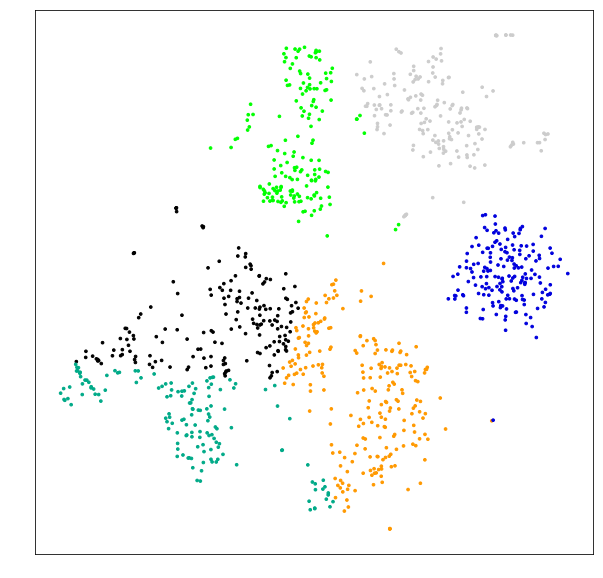

In [9]:
predictions = cluster.predict(df)

In [10]:
Counter(predictions)

Counter({0: 178, 1: 178, 2: 147, 3: 170, 4: 237, 5: 173})

In [11]:
v_measure_score(predictions, datasets.load_digits(n_class=6)['target'])

0.7230614805080724

The V measure score is reasonably good given that we are just doing clustering. Refer to [sklearn's page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) for further explanation on v measure's interpretation.

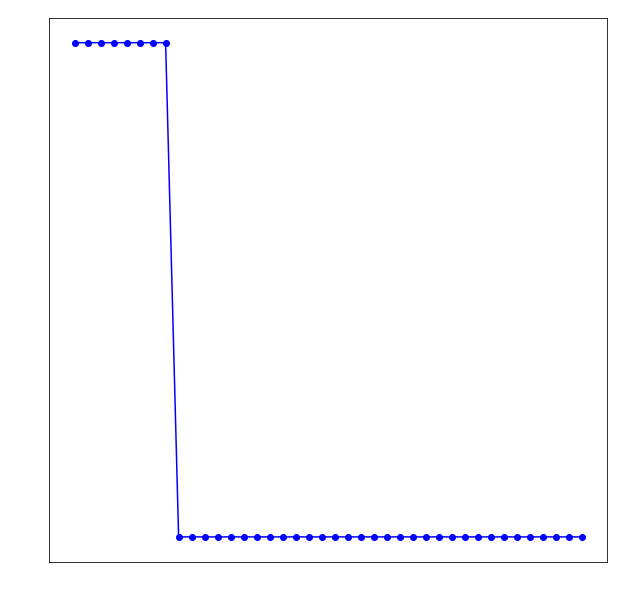

In [14]:
cluster.plot_convergence()

In [15]:
cluster.get_trajectory()

[({'algorithm___TruncatedSVD': 'randomized',
   'branching_factor___Birch': 291,
   'clustering_choice': 'Birch',
   'dim_reduction_choice': 'TruncatedSVD',
   'n_clusters___Birch': 45,
   'n_components___TruncatedSVD': 9},
  2147483648),
 ({'algorithm___TruncatedSVD': 'randomized',
   'branching_factor___Birch': 291,
   'clustering_choice': 'Birch',
   'dim_reduction_choice': 'TruncatedSVD',
   'n_clusters___Birch': 45,
   'n_components___TruncatedSVD': 9},
  2147483647.0),
 ({'affinity___AgglomerativeClustering': 'euclidean',
   'clustering_choice': 'AgglomerativeClustering',
   'dim_reduction_choice': 'KernelPCA',
   'kernel___KernelPCA': 'rbf',
   'linkage___AgglomerativeClustering': 'complete',
   'n_clusters___AgglomerativeClustering': 7,
   'n_components___KernelPCA': 6},
  0.29030455807230865),
 ({'clustering_choice': 'GaussianMixture',
   'covariance_type___GaussianMixture': 'full',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 8.203390083753744,
   'init_